<a href="https://colab.research.google.com/github/Raman-Raje/git-github/blob/master/various_MLP_architectures_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# Reshape data
# took referance form https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28*28))
x_test = x_test.astype('float32') / 255

In [0]:
# converting output classes to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
print(x_train.shape)

(60000, 784)


In [0]:
# took referance from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

def accu_loss(history):
  plt.figure()
  plt.subplot(121)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model Accuracy Plot')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.subplot(122)
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss Plot')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  

##1. MNIST_1

In [0]:
# Standard Values
BATCH_SIZE = 16
EPOCHS = 12

In [0]:
model =  Sequential()
model.add(Dense(128,activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Train model
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.5878 - acc: 0.8283 - val_loss: 0.2284 - val_acc: 0.9324
Epoch 2/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.2899 - acc: 0.9148 - val_loss: 0.1697 - val_acc: 0.9476
Epoch 3/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.2345 - acc: 0.9298 - val_loss: 0.1377 - val_acc: 0.9591
Epoch 4/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.2035 - acc: 0.9396 - val_loss: 0.1210 - val_acc: 0.9633
Epoch 5/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.1833 - acc: 0.9450 - val_loss: 0.1125 - val_acc: 0.9654
Epoch 6/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.1712 - ac

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test1_loss = score[0]*100
test1_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.08561092518400401
Test accuracy: 97.42


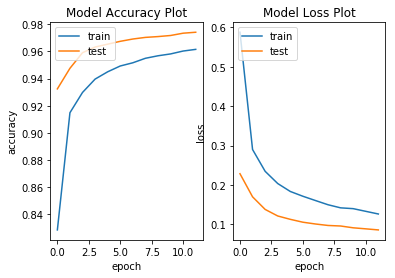

In [0]:
accu_loss(history)

##2. MNIST_2

In [0]:
model =  Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 224us/step - loss: 0.3502 - acc: 0.8936 - val_loss: 0.1490 - val_acc: 0.9550
Epoch 2/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.2019 - acc: 0.9394 - val_loss: 0.1110 - val_acc: 0.9667
Epoch 3/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.1626 - acc: 0.9522 - val_loss: 0.0900 - val_acc: 0.9713
Epoch 4/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.1439 - acc: 0.9563 - val_loss: 0.0871 - val_acc: 0.9733
Epoch 5/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.1279 - acc: 0.9619 - val_loss: 0.0851 - val_acc: 0.9741
Epoch 6/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.1193 - acc: 0.9637 - val_loss: 0.0712 - val_acc: 0.9771
Epoch 7/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.1105 - acc: 0.9670 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test2_loss = score[0]*100
test2_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.06788660122929141
Test accuracy: 97.89999999999999


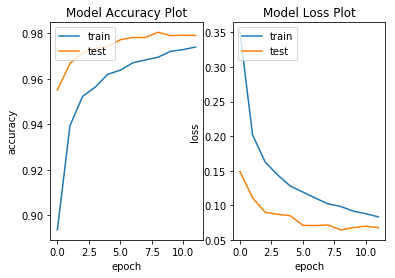

In [0]:
accu_loss(history)

## 3. MNIST_2

In [0]:
model =  Sequential()
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.2513 - acc: 0.9248 - val_loss: 0.1625 - val_acc: 0.9493
Epoch 2/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.1287 - acc: 0.9604 - val_loss: 0.1005 - val_acc: 0.9683
Epoch 3/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0936 - acc: 0.9724 - val_loss: 0.1030 - val_acc: 0.9680
Epoch 4/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0782 - acc: 0.9757 - val_loss: 0.0834 - val_acc: 0.9717
Epoch 5/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0642 - acc: 0.9798 - val_loss: 0.0710 - val_acc: 0.9776
Epoch 6/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0536 - acc: 0.9823 - val_loss: 0.0870 - val_acc: 0.9758
Epoch 7/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0470 - acc: 0.9853 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test3_loss = score[0]*100
test3_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.06867760741595412
Test accuracy: 98.15


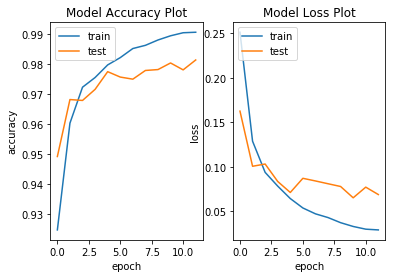

In [0]:
accu_loss(history)

##4. MNIST_3

In [0]:
model =  Sequential()
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.2856 - acc: 0.9174 - val_loss: 0.1411 - val_acc: 0.9561
Epoch 2/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.1432 - acc: 0.9575 - val_loss: 0.1097 - val_acc: 0.9663
Epoch 3/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.1137 - acc: 0.9656 - val_loss: 0.1010 - val_acc: 0.9693
Epoch 4/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.0963 - acc: 0.9709 - val_loss: 0.0974 - val_acc: 0.9697
Epoch 5/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.0832 - acc: 0.9747 - val_loss: 0.0858 - val_acc: 0.9743
Epoch 6/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.0754 - acc: 0.9767 - val_loss: 0.0852 - val_acc: 0.9732
Epoch 7/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.0668 - acc: 0.9790 - val_loss: 0.0815 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test4_loss = score[0]*100
test4_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.09193138070863206
Test accuracy: 97.28999999999999


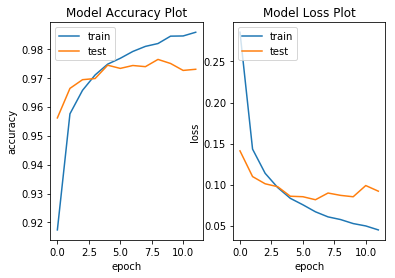

In [0]:
accu_loss(history)

##5. MNIST_4

In [0]:
model =  Sequential()
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.5027 - acc: 0.8458 - val_loss: 0.1679 - val_acc: 0.9512
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.2597 - acc: 0.9263 - val_loss: 0.1253 - val_acc: 0.9646
Epoch 3/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.2059 - acc: 0.9429 - val_loss: 0.1333 - val_acc: 0.9634
Epoch 4/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1787 - acc: 0.9485 - val_loss: 0.1272 - val_acc: 0.9675
Epoch 5/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1588 - acc: 0.9527 - val_loss: 0.1106 - val_acc: 0.9709
Epoch 6/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1438 - acc: 0.9574 - val_loss: 0.1155 - val_acc: 0.9716
Epoch 7/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.1368 - acc: 0.9592 - val_loss: 0.1126 - 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
test5_loss = score[0]*100
test5_accuracy = score[1]*100

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.13697145782522493
Test accuracy: 97.19


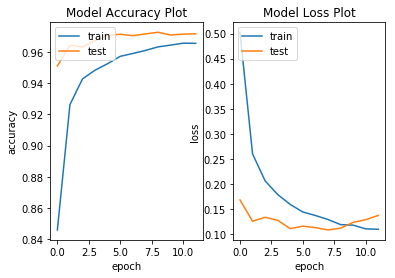

In [0]:
accu_loss(history)

**Observations:**


1.   Model with batchnormalization tend to overfit as comapred to dropout
2.   Batch normalization works as a **weak reguralizer** as can seen from model_3 and model_4 plots.
3.   Maximum accuracy of** 98.2% **found in case of model_3.



##6. Summary

In [0]:
from prettytable import PrettyTable
summary = PrettyTable()

In [0]:
summary.field_names = ["Model", "Batch Normalization", "Dropout",  "Test Loss","Test Accuracy"]

In [0]:
summary.add_row(["MNIST_1","No","Yes (0.5,0.2)",test1_loss,test1_accuracy])
summary.add_row(["MNIST_2","Yes","yes(0.5)",test2_loss,test2_accuracy])
summary.add_row(["MNIST_3","Yes","No",test3_loss,test3_accuracy])
summary.add_row(["MNIST_4","No","Yes (0.5)",test4_loss,test4_accuracy])
summary.add_row(["MNIST_5","Yes","No",test5_loss,test5_accuracy])

In [0]:
print(summary)

+---------+---------------------+---------------+--------------------+-------------------+
|  Model  | Batch Normalization |    Dropout    |     Test Loss      |   Test Accuracy   |
+---------+---------------------+---------------+--------------------+-------------------+
| MNIST_1 |          No         | Yes (0.5,0.2) |  8.5610925184004   |       97.42       |
| MNIST_2 |         Yes         |    yes(0.5)   | 6.788660122929141  | 97.89999999999999 |
| MNIST_3 |         Yes         |       No      | 6.867760741595412  |       98.15       |
| MNIST_4 |          No         |   Yes (0.5)   | 9.193138070863206  | 97.28999999999999 |
| MNIST_5 |         Yes         |       No      | 13.697145782522494 |       97.19       |
+---------+---------------------+---------------+--------------------+-------------------+
